# Fluvial Hazard Zone Prediction
# 2. Data Cleaning 
<img src="http://extras.mnginteractive.com/live/media/site36/2015/0306/20150306__thompson-river-flood-2013~p1.jpg" width="654px" height="420px" title="Colorado&amp;#8217;s historic flooding, 2013" alt="Colorado&amp;#8217;s historic flooding, 2013" border="0">

### Import packages and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# The Data

In [33]:
# Import data from .txt file
txt = r'/Users/Daniel/Documents/Programming/Project_Scripts/CMZ/data/SSV_FINAL.txt'
df = pd.read_csv(txt, sep=",", header=0)

# Reorder the columns and drop FID field (it's duplicated by dataframe index)
reordered_columns = ['long_WGS84', 'lat_WGS84', 'topo2011', 'ground_slope', 'ground_curve', 'near_crossing',
                     'near_road', 'near_stream', 'stream_slope', 'relative_elevation', 'ground_delta' ]
df = df[reordered_columns]

# print the end of the dataframe
print ("Data features, number of entries, data types:", '\n')
df.info()
print ('\n', "Summary statistics by column:", '\n')
df.describe()

Data features, number of entries, data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906130 entries, 0 to 906129
Data columns (total 11 columns):
long_WGS84            906130 non-null float64
lat_WGS84             906130 non-null float64
topo2011              906130 non-null float64
ground_slope          906130 non-null float64
ground_curve          906130 non-null float64
near_crossing         906130 non-null float64
near_road             906130 non-null float64
near_stream           906130 non-null int64
stream_slope          906130 non-null float64
relative_elevation    906130 non-null float64
ground_delta          906130 non-null float64
dtypes: float64(10), int64(1)
memory usage: 76.0 MB

 Summary statistics by column: 



,long_WGS84,lat_WGS84,topo2011,ground_slope,ground_curve,near_crossing,near_road,near_stream,stream_slope,relative_elevation,ground_delta
count,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000,906130.000000
mean,-105.279113,40.213356,5410.988948,9.791411,-0.003026,1055.266465,154.654177,264.309867,1.401222,-1178.179773,0.122275
std,0.005813,0.003581,139.625615,10.764159,7.581042,878.145913,113.894369,162.489172,0.289529,3263.901848,2.193276
min,-105.291637,40.207955,0.000000,0.039599,-921.602417,0.456228,0.000034,0.000000,0.945972,-9999.000000,-100.320312
25%,-105.283693,40.210250,5372.520019,2.413232,-1.327854,383.665253,63.013050,127.000000,1.206320,4.222660,-0.316406
50%,-105.278270,40.212590,5411.410156,5.176315,-0.006782,752.507996,133.358002,255.000000,1.331070,7.213380,0.000000
75%,-105.274510,40.216555,5442.609863,14.037500,1.317003,1467.717468,225.343002,389.000000,1.543330,30.084000,0.538086
max,-105.268215,40.220899,5676.779785,86.546898,726.185425,3573.330078,635.619995,782.000000,1.920190,267.023987,47.691895


# Examining suspicious feature values
Although this analysis uses the best available raw data, it's not uncommon to have errors at the edges of the analysis or even holes in the underlying data.  Using the summary statistics above, we'll further clean the data of the outlier and suspicious values.  This is required for machine learning algorithms to function correctly

### Removing points with 'relative_elevation' values equal to -9999.
Looking at the description of each field, most appear to have a reasonable range of values.  However, 'relative_elevation' has a minimum value of -9999.000000.  These are likely error in the data geoprocessing.  

Without knowing more about these locations, we can't interpret these values or make assumptions about their correct values.  Therefore we'll remove all entries with -9999 as a minimum value.

In [34]:
# Determine the number of observations with suspicious 'realtive_elevation' values
print ("%s rows of the data have a 'relative_elevation' value of -9999." %(df[df.relative_elevation ==-9999]['relative_elevation'].count()))
print ("%.2f percent of the total observations will be removed." %(df[df.relative_elevation ==-9999]['relative_elevation'].count()/len(df)*100))
print ('\n')
# Remove these data points as we don't have a defensable method to interpolate this value
df.drop(df[df.relative_elevation == -9999].index, inplace=True)

df.describe()


109109 rows of the data have a 'relative_elevation' value of -9999.
12.04 percent of the total observations will be removed.




,long_WGS84,lat_WGS84,topo2011,ground_slope,ground_curve,near_crossing,near_road,near_stream,stream_slope,relative_elevation,ground_delta
count,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000,797021.000000
mean,-105.278829,40.213429,5410.087984,9.754328,-0.010887,924.625597,154.202215,244.386852,1.421625,29.355379,0.111300
std,0.005329,0.003282,131.733284,10.917529,7.845263,804.017753,111.377745,154.737794,0.292179,42.557130,2.302985
min,-105.290096,40.208824,0.000000,0.039599,-921.602417,0.456228,0.000034,0.000000,0.945972,-3.879880,-100.320312
25%,-105.282648,40.210485,5373.970215,2.392070,-1.352268,348.088013,63.445900,114.000000,1.206320,5.372560,-0.337891
50%,-105.277983,40.212881,5409.330078,5.129660,-0.008138,643.809998,134.315994,232.000000,1.331070,7.912600,-0.008301
75%,-105.274683,40.216354,5438.430176,13.548101,1.338704,1167.020019,226.210998,362.000000,1.564440,37.558102,0.539551
max,-105.269253,40.219793,5676.779785,86.546898,726.185425,3215.760010,631.447022,762.000000,1.920190,267.023987,43.019531


### Removing points with 'topo2011' values equal to 0.
This analysis is not looking at any areas at sea level, so we know these points should be removed.

In [35]:
# Determine the number of observations with suspicious 'topo2011' values
print ("%s rows of the data have a 'topo2011' value of 0." %(df[df.topo2011 == 0]['topo2011'].count()))
print ("%.2f percent of the total observations will be removed." %(df[df.topo2011 == 0]['topo2011'].count()/len(df)*100))
print ('\n')
# Remove these data points as we don't have a defensable method to interpolate this value
df.drop(df[df.topo2011 == 0].index, inplace=True)

df.describe()

401 rows of the data have a 'topo2011' value of 0.
0.05 percent of the total observations will be removed.




,long_WGS84,lat_WGS84,topo2011,ground_slope,ground_curve,near_crossing,near_road,near_stream,stream_slope,relative_elevation,ground_delta
count,796620.000000,796620.000000,796620.000000,796620.000000,796620.000000,796620.000000,796620.000000,796620.00000,796620.000000,796620.000000,796620.000000
mean,-105.278827,40.213429,5412.811297,9.754516,-0.012947,924.362828,154.109625,244.27576,1.421609,29.322089,0.111359
std,0.005329,0.003282,51.201541,10.918777,7.845848,803.939340,111.310954,154.69153,0.292158,42.514406,2.303563
min,-105.290096,40.208824,5328.560059,0.039599,-921.602417,0.456228,0.000034,0.00000,0.945972,-3.879880,-100.320312
25%,-105.282646,40.210485,5374.020019,2.391720,-1.352268,347.969749,63.416276,113.00000,1.206320,5.371458,-0.337891
50%,-105.277982,40.212882,5409.350098,5.128305,-0.009494,643.585022,134.244003,232.00000,1.331070,7.909670,-0.008789
75%,-105.274682,40.216354,5438.439941,13.549350,1.335992,1166.449951,226.085007,361.00000,1.564440,37.501624,0.540039
max,-105.269253,40.219793,5676.779785,86.546898,726.185425,3215.760010,631.447022,762.00000,1.920190,267.023987,43.019531


The 'rel_elev' field now has a decent looking quantile. The minimum is still -3.87 (ft).  Given that this field describes a point's elevation relative to the nearest stream, possibly this describes a pond or wetland area.  

The 'topo2011' field has min and max elevation values that are in the expected range.

However, <b>the 'ground_delta' field has a minimum value of -100.32 (ft)</b>.  Although large floods do scour new channels and move significant amounts of sediment around the floodplain, this value seems suspicious. Given that 'ground_delta' is the target feature that will help to predict Fluvial Hazard Zones, it's worthy of a closer look.

# Examining noise in the target feature - 'ground_delta'

The target feature of this data analysis (Fluvial Hazard Zone) is based on the topographic change from 2011 (before the historic floods) to 2013 (after the historic floods).  This value is stored in the 'ground_delta' attribute and represents the value of the 2013 ground surface raster minus the 2011 ground surface raster in cell sizes of 3x3 feet.  

<b>We'll be generating a binary classification from this topographic change (0="False, not a FHZ", 1="True, is a FHZ").  </b> We need to confirm the signal and noise in this feature before conversion from the numeric values (2013 elevations minus 2011 elevations) to boolean (true or false) values.

The rasters were developed from LiDAR point clouds collected during 2 separate aerial surveys of the region. Both LiDAR collections were postprocessed following standard practices before conversion to raster format (digital elevation models). Some futher background on LiDAR: (https://oceanservice.noaa.gov/facts/lidar.html).

### Plot the histogram and cdfs of the 'ground_delta' values

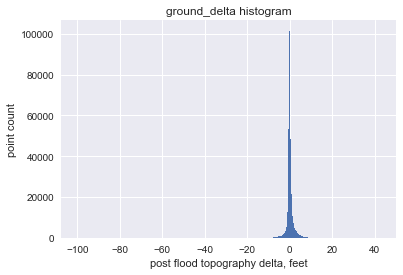

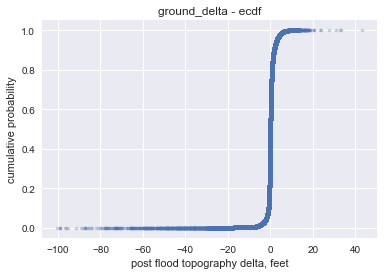

In [39]:
# Lets take a look at the histogram and cumulative distribution function of the ground_delta values

# Plot the distribution of the 'ground_delta' observations (target feature)
x = (df['ground_delta'])
bins = int(np.sqrt(len(df)))
x.hist(bins=bins)
plt.title('ground_delta histogram')
plt.xlabel('post flood topography delta, feet')
plt.ylabel('point count')
plt.show()


# Define a function to generate the sorted values and ranks for an ECDF plot
def ecdf(data): 
    """Compute ECDF for a one-dimensional array of measurements."""
    # Count the number of data points: n
    n = float(len(df))
    # x-data for the ECDF: x sorted from low to high
    x = np.sort(df['ground_delta'])
    # y-data for the ECDF: y as a list of ranks, low to high
    y = np.arange(1,n+1) / n
  
    return x, y

# Call the ecdf function, and generate a plot

x_vers, y_vers = ecdf(df['ground_delta'])
plt.plot(x_vers, y_vers, marker='.', alpha=0.3, linestyle='None')
plt.xlabel('post flood topography delta, feet')
plt.ylabel('cumulative probability')
plt.title('ground_delta - ecdf')
plt.margins(0.05)
plt.show()



### Both the histogram and ecdf point to the target feature having significant outliers.</b>

There's a lot of values concentrated around 0, and long tails both below and above the
ecdf's center of mass. We know that outliers are important in this data - large 'ground_delta' values represent the Fluvial Hazard Zones we're trying to predict (although FHZs may also have smaller 'ground_delta' values). 

However, from our summary statistics we see that the extremes are -100.32 (erosion) and 43.02 (deposition).  These are very large values that give pause. So, here's a few options we have to handle the 'ground_delta' outliers:

<b>A. Examine 'ground_delta' values from a dataset well outside of any expected FHZ.</b> This may help us understand the inherent noise between the 2011 and 2013 elevation data free from influence of major fluvial erosion or deposition.

<b>B. Choose a quantile range






## Examining non-floodplain 'ground_delta' values

In [12]:
# import non-flooplain data from txt
# Import data from .txt file
txt = r'/Users/Daniel/Documents/Programming/Project_Scripts/CMZ/data/NONFP_FINAL.txt'
df_nonfp = pd.read_csv(txt, sep=",", header=0)
df_nonfp.describe()

,FID,topo2011,ground_delta,ground_curve,ground_slope,long_WGS84,lat_WGS84
count,297993.000000,297993.000000,297993.000000,297993.000000,297993.000000,297993.000000,297993.000000
mean,148996.000000,5744.620768,-0.262430,0.029672,9.781662,-105.281805,40.217478
std,86023.313721,44.339357,0.574842,1.613552,7.095397,0.001462,0.001503
min,0.000000,5567.419922,-19.007799,-51.519100,0.571818,-105.284336,40.214875
25%,74498.000000,5718.189941,-0.416504,-0.459068,5.325200,-105.283071,40.216177
50%,148996.000000,5739.180176,-0.242188,-0.010016,7.704400,-105.281805,40.217478
75%,223494.000000,5771.140137,-0.033691,0.470753,10.992300,-105.280539,40.218780
max,297992.000000,5877.689941,6.816890,54.748798,67.138802,-105.279274,40.220081


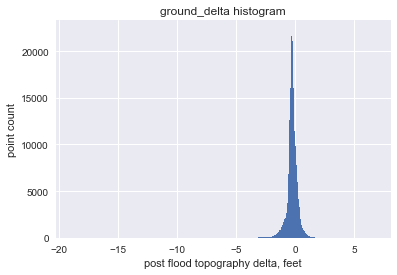

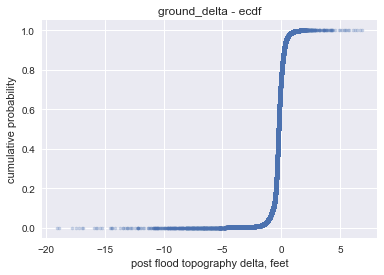

In [62]:
# Plot the distribution of the 'ground_delta' observations (target feature)
x = (df_nonfp['ground_delta'])
bins = int(np.sqrt(len(df_nonfp)))
x.hist(bins=bins)
plt.title('ground_delta histogram')
plt.xlabel('post flood topography delta, feet')
plt.ylabel('point count')
plt.show()

# Define a function to generate the sorted values and ranks for an ECDF plot
# def ecdf(data): 
#     """Compute ECDF for a one-dimensional array of measurements."""
#     # Count the number of data points: n
#     n = float(len(df_nonfp))
#     # x-data for the ECDF: x sorted from low to high
#     x = np.sort(df_nonfp['ground_delta'])
#     # y-data for the ECDF: y as a list of ranks, low to high
#     y = np.arange(1,n+1) / n
  
#     return x, y

# x_vers, y_vers = ecdf(df_nonfp['ground_delta'])
# plt.plot(x_vers, y_vers, marker='.', alpha=0.3, linestyle='None')
# plt.xlabel('post flood topography delta, feet')
# plt.ylabel('cumulative probability')
# plt.title('ground_delta - ecdf')
# plt.margins(0.05)
# plt.show()

In [48]:
print ('non-floodplain ground_delta observations equal to zero: ', df_nonfp[df_nonfp.ground_delta == 0]['ground_delta'].count())
print ('non-floodplain ground_delta mean: ', df_nonfp.ground_delta.mean())
print ('non-floodplain ground_delta median: ', df_nonfp.ground_delta.median())

non-floodplain ground_delta observations equal to zero:  114
non-floodplain ground_delta mean:  -0.2624299673123177
non-floodplain ground_delta median:  -0.24218800000000001


In [54]:
# Specify the 0.25th and 99.75th percentile values
# percentiles = np.array([.05,2.5,5,95,97.5,99.5])
percentiles = np.array([5,95])

# Compute percentiles: ptiles_vers
ptile_vers = np.percentile(df_nonfp['ground_delta'],percentiles)
print (ptile_vers)

mask = (df_nonfp.ground_delta > ptile_vers[0]) & (df_nonfp.ground_delta < ptile_vers[1])
columns = df_nonfp.columns.values
df_nonfp2 = pd.DataFrame(df_nonfp.loc[mask, columns])
df_nonfp2.describe()

[-1.0249    0.404785]


,FID,topo2011,ground_delta,ground_curve,ground_slope,long_WGS84,lat_WGS84
count,268183.000000,268183.000000,268183.000000,268183.000000,268183.000000,268183.000000,268183.000000
mean,143687.659378,5745.270822,-0.234440,0.046088,8.564193,-105.281772,40.217571
std,83734.725190,41.383862,0.273651,1.096825,5.325524,0.001462,0.001463
min,0.000000,5567.419922,-1.024410,-51.519100,0.571818,-105.284336,40.214875
25%,71768.500000,5719.049805,-0.394531,-0.409822,5.108325,-105.283040,40.216319
50%,141985.000000,5738.919922,-0.242188,0.001669,7.289970,-105.281719,40.217600
75%,215328.500000,5770.009766,-0.062500,0.450304,10.041450,-105.280515,40.218828
max,297992.000000,5877.520019,0.404297,27.049101,57.443298,-105.279274,40.220081


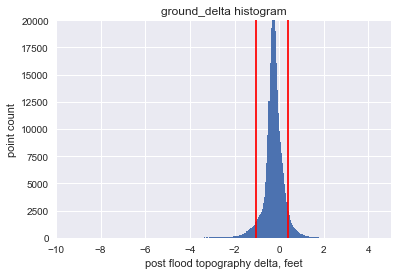

In [55]:
# # Specify array of percentiles: percentiles
# percentiles = np.array([0.5,2.5,25,50,75,97.5,99.5])

# # Compute percentiles: ptiles_vers
# ptiles_vers = np.percentile(df_nonfp2['ground_delta'],percentiles)
# print (ptiles_vers)

# Plot the distribution of the 'ground_delta' observations (target feature)
x = (df_nonfp['ground_delta'])
bins = int(np.sqrt(len(df_nonfp)))
x.hist(bins=bins)
plt.title('ground_delta histogram')
plt.xlabel('post flood topography delta, feet')
plt.ylabel('point count')
# plt.show()

# Plot vertical lines at the percentiles
for ptile in ptile_vers:
    plt.axvline(x=ptile, color='red')
plt.axis([-10,5,0,20000])
plt.show()


# x.hist(bins=bins)
# plt.title('ground_delta histogram')
# plt.xlabel('post flood topography delta, feet')
# plt.ylabel('point count')



greater than  1.5 standard deviations from mean = 0.11 feet +- 3.46 feet
count = 50098


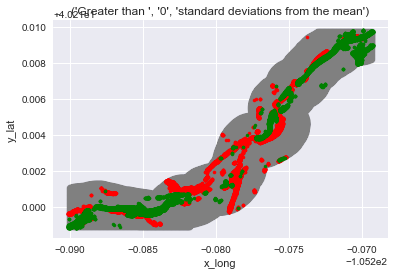

greater than  4 standard deviations from mean = 0.11 feet +- 9.21 feet
count = 4209


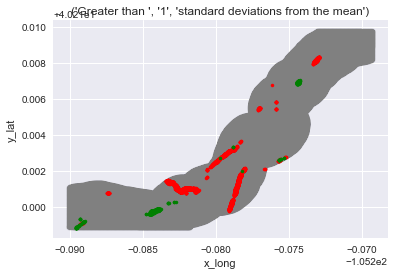

greater than  8 standard deviations from mean = 0.11 feet +- 18.43 feet
count = 1380


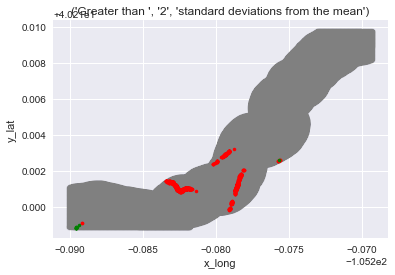

greater than  16 standard deviations from mean = 0.11 feet +- 36.86 feet
count = 399


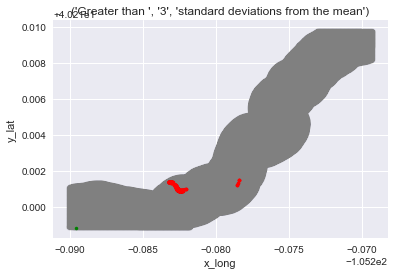

In [58]:
# Let's first take a look at the values that are greater than two 
# standard deviations from the mean, then values more than 10 standard deviation from the mean

#determine the mean  and standard deviation of ground_delta values
mean = np.mean(df['ground_delta'])
std_dev = np.std(df['ground_delta'])

# Define range of std deviation for plotting
std_devRange = (1.5,4,8,16)

# Make plots of the outliers for each std deviation range
for i, val in enumerate(std_devRange):
    # Plot the data with ground_delta values more than 'i' standard deviations from the mean
    std_devs = np.std(df['ground_delta'])*val
    print ('greater than ', val, 'standard deviations from mean = %2.2f feet +- %2.2f feet' % (mean, std_devs))
    neg_outliers = (df[df['ground_delta']<(-1*std_devs + mean)])
    pos_outliers = (df[df['ground_delta']>(std_devs + mean)])
    count = np.sum(len(neg_outliers) + len(pos_outliers))
    print ('count = %2d' % (count))
    
    # Plot the outliers
    plt.figure()
    plt.plot(df['long_WGS84'], df['lat_WGS84'], marker='.', color='grey', alpha=0.05, linestyle='None')
    plt.plot(neg_outliers['long_WGS84'], neg_outliers['lat_WGS84'], marker='.', color='red', linestyle='None')
    plt.plot(pos_outliers['long_WGS84'], pos_outliers['lat_WGS84'], marker='.', color='green', linestyle='None')
    plt.title(('Greater than ', str(i), 'standard deviations from the mean'))
    plt.xlabel('x_long')
    plt.ylabel('y_lat')
    plt.show()

The plots above have the study area points in the background and colored grey.  The red points are cells with erosion greater than the cutoff values (based on standard deviations from the mean).  The green are cells with deposition greater the cutoff values (also based on standard deviations from the mean).  The type of map we expect to see will have erosion and deposition around the river corridor.  Although hillslopes might experience minor erosion and deposition, this area is did not experience landslides or major slope failures. 

How many standard deviations the appropriate cuttoff value for determining areas of channel migration?  We'll need to look at a slice of the data outside of the river corridor to understand the noise associated with the original data collection process

## Examine the noise in the target feature in non-floodplain areas

## Test ground_delta values for normal distribution?
### http://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm

We've taken a sample of data from a nearby area that has no streams or rivers.  If the data capture of land elevations before and after the flood were perfect, we'd expect almost all cell values to be near 0 in this area, which would indicate no topographic change from the flooding event. 

In [3]:
# Import the SouthStVrain_nonfppts.csv file (non flooplain pts) and print statistics

csv = r'/Users/Daniel/Documents/Programming/Project_Scripts/CMZ/data/SouthStVrain_nonfppts2.csv'

df_nonfp = pd.read_csv(csv, header=0)
print (df_nonfp.info())
print (df_nonfp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534848 entries, 0 to 534847
Data columns (total 6 columns):
OBJECTID      534848 non-null int64
GRID_CODE     534848 non-null float64
lat_WGS84     534848 non-null float64
long_WGS84    534848 non-null float64
grnd_slope    534848 non-null float64
grnd_curve    534848 non-null float64
dtypes: float64(5), int64(1)
memory usage: 24.5 MB
None
            OBJECTID      GRID_CODE      lat_WGS84     long_WGS84  \
count  534848.000000  534848.000000  534848.000000  534848.000000   
mean   267424.500000      -0.427168      40.219274    -105.281790   
std    154397.462725       0.691646       0.002608       0.001513   
min         1.000000     -17.973145      40.214758    -105.284421   
25%    133712.750000      -0.754883      40.217016    -105.283101   
50%    267424.500000      -0.471191      40.219272    -105.281790   
75%    401136.250000      -0.078613      40.221528    -105.280480   
max    534848.000000       8.286621      40.223794    -1

In [21]:
### Plotting data from Pandas DataFrames

# Read in the CSV file: df
df_nonfp_sample = df_nonfp.sample(frac=0.25, replace=False)

# Import figure from bokeh.plotting
from bokeh.plotting import figure
# Import output_file and show from bokeh.io
from bokeh.io import output_file, show, output_notebook, reset_output

# Create the figure: p
p = figure(x_axis_label='ground_delta', y_axis_label='ground_slope')

# Plot mpg vs hp by color
p.circle(df_nonfp_sample['GRID_CODE'], df_nonfp_sample['grnd_slope'], size=10) #color=df['color']


# Specify the name of the output file and show the result
# output_file('auto-df.html')
reset_output()
output_notebook()
show(p)

Loading BokehJS ...

As compared to the river corridor dataset ('df' dataframe), this non-floodplain data has a lower mean ground_delta value and smaller standard deviation.  This would be expected as riverine erosion was not in process outside of the river corridor.

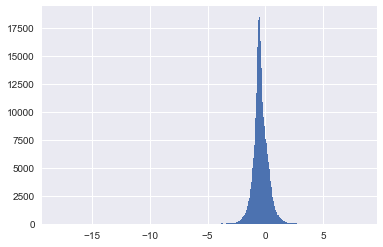

In [4]:
# Print histogram of non floodplain ground_delta valuess ('GRID_CODE' in this csv)
bins = int(np.sqrt(len(df_nonfp)))
plt.hist(df_nonfp['GRID_CODE'], bins=bins)
plt.show()

There's a strong concentration of values around zero. There are also some outliers showing larger absolute values of the ground_delta measurement (erosion or deposition), likely in ephemeral gullies that ran during the flood event.  In this non-floodplain area, we're looking to define the mean ground delta value (which in a non floodplain area we'll define as noise) with a 95% confidence interval.

## Computing the non-floodplain ground_delta  (GRID_CODE) mean with a 99% confidence interval

In [5]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.99):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean_confidence_interval(df_nonfp['GRID_CODE'], confidence=0.99)


(-0.42716768762541885, -0.42960374353264297, -0.42473163171819472)

From this we can say:  "With 99% confidence, the mean error between the 2013 and 2011 ground elevation capture is between -0.4247 and -0.4296 feet."  Said another way, the 2013 (post-flood) LiDAR flight and data processing estimated background elevations at approximately 4/10ths of a foot lower than the 2011 (pre-flood) LiDAR flight and data processing.  Which was correct?  We don't know and don't really care.  The range is extremely small and we can use the mean to shift the ground_delta values to reflect the background error in the ground_delta target field.  

After that, we need more information to determine a range of values that are simple too 'noisy' to use for prediction.

# Restart here, adjust the entire ground_delta column by the mean error in non-floodplain dataset and determine the range of values that are too noisy to use in prediction

[-3.32171997  2.06298828]
                 FID   GRID_CODE   lat_WGS84  long_WGS84
count     987.000000  987.000000  987.000000  987.000000
mean   436091.782168   -5.232559   40.216426 -105.281093
std    134176.112363    3.982259    0.002266    0.001287
min     30220.000000  -17.973145   40.214775 -105.283889
25%    476023.500000   -6.863770   40.215320 -105.282044
50%    489285.000000   -5.119629   40.215528 -105.280745
75%    501562.500000   -4.344482   40.215752 -105.280058
max    533946.000000    8.286621   40.223282 -105.279188
[-15.9136084  -12.84328613  -6.86376953  -5.11962891  -4.34448242
   5.35615235   7.30071777]


[-5, 5, 0, 20000]

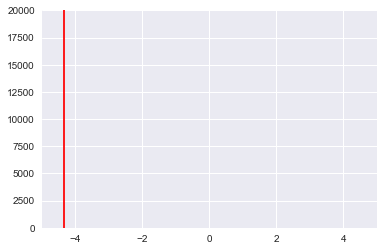

In [29]:

# Specify the 0.25th and 99.75th percentile values
percentiles = np.array([0.25,99.75])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df_nonfp['GRID_CODE'],percentiles)
print (ptiles_vers)

mask = (df_nonfp.GRID_CODE > ptile_vers[0]) | (df_nonfp.GRID_CODE < ptile_vers[1])
columns = df_nonfp.columns.values
df_nonfp2 = pd.DataFrame(df_nonfp.loc[mask, columns])
print (df_nonfp2.describe())

# Specify array of percentiles: percentiles
percentiles = np.array([0.5,2.5,25,50,75,97.5,99.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df_nonfp2['GRID_CODE'],percentiles)
print (ptiles_vers)

for ptile in ptiles_vers:
    plt.axvline(x=ptile, color='red')
plt.axis([-5,5,0,20000])

## Create new dataframe with the cleaned target values, where ground delta is outside of the 2.5th and 97.5th percentile

In [30]:
# Create subset of the df dataframe 

# Get df columns names as a list
columns = df.columns.values
outliers_mask = (ptiles_vers[1] > df.ground_delta) | (df.ground_delta > ptiles_vers[5])
outliers = pd.DataFrame(df.loc[outliers_mask, columns])
print (outliers.info())
print (outliers.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225820 entries, 28634 to 855710
Data columns (total 12 columns):
FID                   225820 non-null int64
2011topo              225820 non-null float64
stream_slope          225820 non-null float64
near_crossing         225820 non-null float64
near_road             225820 non-null float64
ground_delta          225820 non-null float64
near_stream           225820 non-null int64
ground_curve          225820 non-null float64
relative_elevation    225820 non-null float64
ground_slope          225820 non-null float64
long_WGS84            225820 non-null float64
lat_WGS84             225820 non-null float64
dtypes: float64(10), int64(2)
memory usage: 22.4 MB
None
                 FID       2011topo   stream_slope  near_crossing  \
count  225820.000000  225820.000000  225820.000000  225820.000000   
mean   440803.850664    5410.303465       1.362542     983.499824   
std    251182.854623      54.949432       0.261997     775.950611   
min 

## Plot the outliers with the mapbox API

In [10]:
# Import mapbox packages and dependencies
from mapboxgl.utils import *
from mapboxgl.viz import *
import pysal.esda.mapclassify as mapclassify

In [11]:
# Import the public token from personal mapbox account
# Must be a public token, starting with `pk`
token = os.getenv('MAPBOX_ACCESS_TOKEN','pk.eyJ1IjoiaW5kaWVseXQiLCJhIjoiY2pkcXZyMGZpMDB6NzJxbGw4aXdvb2w3bCJ9.sL_EzvrSj83Y0Hi1_6GT6A')

In [49]:
# Create a downsampled version of the full dataframe for plotting.
# df_sample = df.loc[df['cmz_prediction'] == 1]
# df_sample = df.sample(frac=0.25, replace=False)

# Create a geojson file export from the current dataframe
df_to_geojson(outliers, filename='outliers.geojson',
              properties=['ground_delta', 'kmeans'], 
                     lat='lat_WGS84', lon='long_WGS84', precision=8)

{'feature_count': 225820, 'filename': 'outliers.geojson', 'type': 'file'}

In [62]:
# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'ground_delta'
color_breaks = [round(outliers[measure].quantile(q=x*0.1), 2) for x in range(1,9)]
color_stops = create_color_stops(color_breaks, colors='YlGnBu')

# Create the viz from the outliers dataframe
viz = CircleViz('outliers.geojson',
                access_token=token, 
                height='400px',
                color_property = "ground_delta",
                color_stops = color_stops,
                center = (-105.279,40.2136),
                zoom = 13,
                below_layer = 'waterway-label')

# Change the background to satellite and show the viz
viz.style_url='mapbox://styles/mapbox/satellite-streets-v9'
viz.show()
                  

In [71]:
#Create a heatmap to examine 'ground_delta' values
measure = 'ground_delta'
heatmap_color_stops = create_color_stops([0.01,0.25,0.5,0.75,1], colors='RdPu')
heatmap_radius_stops = [[0,1], [15, 5]] #increase radius with zoom

color_breaks = [round(outliers[measure].quantile(q=x*0.1), 2) for x in range(1,9)]
color_stops = create_color_stops(color_breaks, colors='Spectral')

heatmap_weight_stops = create_weight_stops(color_breaks)

#Create a heatmap 
viz2 = HeatmapViz('outliers.geojson', 
                  access_token=token,
                  weight_property = "ground_delta",
                  weight_stops = heatmap_weight_stops,
                  color_stops = heatmap_color_stops,
                  radius_stops = heatmap_radius_stops,
                  opacity = 0.9,
                  center = (-105.279,40.2136),
                  zoom = 13,
                  below_layer='waterway-label'
                 )

viz2.style_url='mapbox://styles/mapbox/satellite-streets-v9'
viz2.show()

This is looking more reasonable than the two standard deviation method.  We'll identify noise as values between the 2.5th and 97.5th percentiles of the ground delta values. These noisy values will be converted to zero.

In [92]:
# Out of curiosity, is there a natural clustering going on here?

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
# drop the columns we don't want to predict on (included kmeans for running the notebook multiple times)
drop_columns = ['FID', '2011topo', 'long_WGS84', 'lat_WGS84', 'kmeans', 'near_crossing', 'near_road']
outliers_kmeans = outliers.drop(drop_columns, axis=1)
print (outliers_kmeans.describe())

# Convert to numpy array for kmeans, fit, and generate the predictions as labels
X = np.array(outliers_kmeans)
X = normalize(X, axis=0)
kmeans = KMeans(n_clusters=2, random_state=23).fit(X)
labels = kmeans.labels_
print (labels)

# Assign the predictions back to the outliers_kmeans dataframe
outliers_kmeans['kmeans'] = labels
# Assign the lat longs back to the dataframe for plotting
outliers_kmeans['long_WGS84'] = outliers['long_WGS84']
outliers_kmeans['lat_WGS84'] = outliers['lat_WGS84']
print (outliers_kmeans.describe())

# Create a geojson file export from the current dataframe
df_to_geojson(outliers_kmeans, filename='outliers_kmeans.geojson',
              properties=['ground_delta', 'kmeans'], 
                     lat='lat_WGS84', lon='long_WGS84', precision=8)

        stream_slope   ground_delta    near_stream   ground_curve  \
count  225820.000000  225820.000000  225820.000000  225820.000000   
mean        1.362542       0.165546     166.388362      -0.011915   
std         0.261997       4.238612     136.246283       6.999636   
min         0.945972     -97.996101       0.000000    -183.481995   
25%         1.118810      -2.288090      50.000000      -1.380960   
50%         1.306900       1.208500     140.000000      -0.125618   
75%         1.543330       2.395020     247.000000       1.066710   
max         1.920190      41.018600     708.000000     271.321991   

       relative_elevation   ground_slope  
count       225820.000000  225820.000000  
mean            27.125775      14.158919  
std             45.040568      14.146106  
min             -3.667970       0.297658  
25%              3.741700       3.464058  
50%              5.952640       7.930710  
75%             27.798624      22.802626  
max            265.274994      84.

{'feature_count': 225820,
 'filename': 'outliers_kmeans.geojson',
 'type': 'file'}

In [93]:
# Generate data breaks using numpy quantiles and color stops from colorBrewer
kmeans_color_stops = [
    [0.0, 'rgb(255,255,204)'],
    [1.0, 'rgb(128,0,38)']]

# Create the viz from the outliers dataframe
viz3 = CircleViz('outliers_kmeans.geojson',
                access_token=token, 
                height='400px',
                color_property = "kmeans",
                color_stops = kmeans_color_stops,
                center = (-105.279,40.2136),
                zoom = 13,
                below_layer = 'waterway-label')

# Change the background to satellite and show the viz
viz3.style_url='mapbox://styles/mapbox/satellite-streets-v9'
viz3.show()

## Convert ground delta values to booleans

In [26]:
# Mask of the noisy values
noise_mask = (ptiles_vers[1] <= df.ground_delta) & (df.ground_delta <= ptiles_vers[5])

# Recalc values based on ground_delta values to booleans
df.loc[noise_mask, 'ground_delta'] = 0
df.loc[outliers_mask, 'ground_delta'] = 1

# Examine the new ground_delta values
print (df['ground_delta'].describe())

count    797021.000000
mean          0.125656
std           0.755156
min          -1.706050
25%          -0.387207
50%           0.129883
75%           1.000000
max           1.000000
Name: ground_delta, dtype: float64
count    797021.000000
mean          0.283330
std           0.450616
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: ground_delta, dtype: float64


## Export a clean verion of the data to a csv file

In [22]:
# Output CSV of cleaned data
df.to_csv('cmz_points_clean.csv', sep=',', header=True, index=True)
print ('cleaned up data has been written to csv')

cleaned up data has been written to csv


In [ ]:
## BOKEH HISTOGRAM

from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde

pdf = gaussian_kde(df.ground_delta)
from scipy.stats import norm
cdf = norm.cdf(df.ground_delta)

x = linspace(0,1,1)

p = figure(x_axis_type="linear", plot_height=300)
# p.line(x, pdf(x))

p.line(x, pdf(x), line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
# p.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")
# 
# plot actual hist for comparison
hist, edges = histogram(df.ground_delta, density=True, bins=100)# bins=int(np.sqrt(len(df))))
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha=0.4)

p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

output_notebook()
show(p)

# References:

### 2013 Flood and Fluvial Hazard Mapping References:  
http://extras.mnginteractive.com/live/media/site36/2015/0306/20150306__thompson-river-flood-2013~p1.jpg : Photo credit 
http://coloradohazardmapping.com/hazardMapping/fluvialMapping : CWCB Fluvial Hazard Mapping Delineation Guide

### Technical References:   
